<a href="https://colab.research.google.com/github/saileepanchbhai/Advance-Machine-Learning-Lab/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
#Importing files from local device
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving iris.csv to iris.csv
User uploaded file "iris.csv" with length 3858 bytes


In [ ]:
# Load the Iris dataset
df = pd.read_csv('iris.csv')

In [ ]:
# Read the data
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# reading perticular colunm info
col_data=df['species']
print(col_data)

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object


In [ ]:
#Getting how many categories are there in the column species
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
#count how many times each category appears
df['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [ ]:
# dropping species colunm as it is an output
df = df.drop('species',axis=1)

In [ ]:
# checking whether the species column is still there or not
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# To bring the features to the same scale.
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


In [ ]:
#Importing library for Kmeans clustering
from sklearn.cluster import KMeans
#Manual Process : Elbow Method :to select the K value
wcss = []                        # Creates an empty list to store WCSS values
for k in range(1, 11):           #Tries number of clusters from 1 to 10
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    # n_clusters=k → number of clusters;
    # init='k-means++' → smart centroid initialization
    # random_state=42 → reproducible results
    kmeans.fit(df)              #Fits K-Means on the dataset and Uses E. distance
    wcss.append(kmeans.inertia_)# inertia_ = WCSS Measures how compact the clusters are

In [ ]:
wcss

[41.13817202297779,
 12.143688281579719,
 7.138647703985377,
 5.5416577630824975,
 4.9997160154877855,
 4.07029077328491,
 3.510433507793471,
 3.16487027131338,
 2.815190267731449,
 2.6165346380115833]

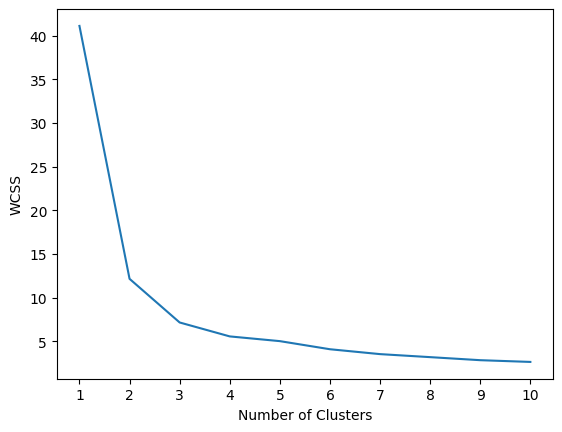

In [ ]:
#plot elbow curve
plt.plot(range(1,11),wcss)#Plots no. of clusters(K) on X-axis & WCSS on Y-axis
plt.xticks(range(1,11))           # Shows every cluster value clearly (1 to 10)
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
#silhouette score to decide the value of K
from sklearn.metrics import silhouette_score

In [ ]:
sihoutte_coefficients = []        # List to store silhouette scores for each k
for k in range(2,11):             # Starts from k=2
  kmeans = KMeans(n_clusters=k, init='k-means++')
  # Initialize K-Means clustering model with k clusters using k-means++
  kmeans.fit(df)                  # Fit the K-Means model on the dataset
  score = silhouette_score(df,kmeans.labels_)
      # kmeans.labels_ stores the cluster assignment for each data point
      # after the K-Means algorithm is fitted.
  sihoutte_coefficients.append(score)  # Store the silhouette score for the current number of clusters

In [ ]:
sihoutte_coefficients

[np.float64(0.6294675561906644),
 np.float64(0.5043188549150884),
 np.float64(0.4435001045329514),
 np.float64(0.3603180414853914),
 np.float64(0.34768437644936245),
 np.float64(0.29496581349490836),
 np.float64(0.346406327021922),
 np.float64(0.3138108085526889),
 np.float64(0.35519885654113326)]

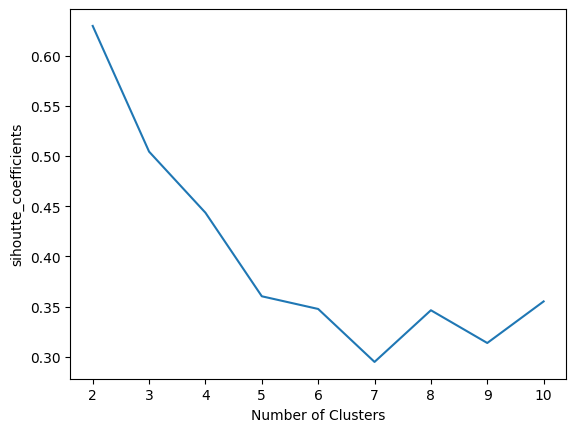

In [ ]:
#plot silhouette score
plt.plot(range(2,11),sihoutte_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("sihoutte_coefficients")
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
#Create a K-Means clustering model with 3 clusters;
# k-means++ improves centroid initialization
# random_state ensures reproducibility

In [ ]:
df['Cluster']= kmeans.fit_predict(df[['sepal_length','sepal_width','petal_length','petal_width']])
# Selects the features used for clustering:
# (sepal_length, sepal_width, petal_length, petal_width)
# Fits the K-Means model on these features
# Predicts the cluster for each data point
# Stores the cluster label (0, 1, 2) in a new column called Cluster

In [ ]:
print(df['Cluster'].value_counts())
#Counts how many data points belong to each cluster and Shows the size of each cluster

Cluster
0    52
1    50
2    48
Name: count, dtype: int64


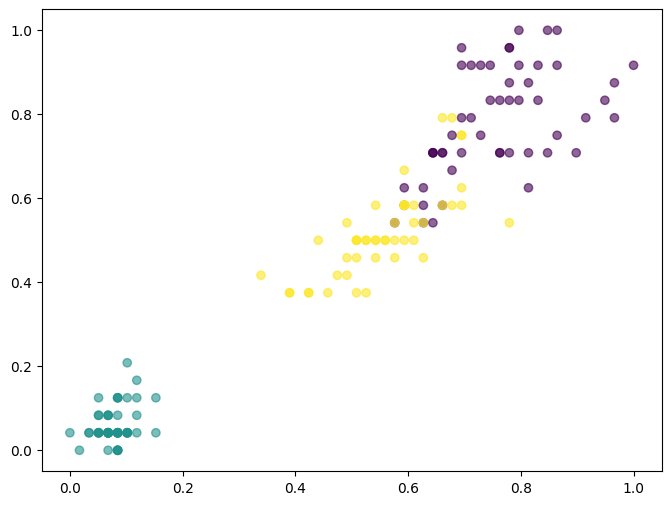

In [ ]:
# Scatter plot showing cluster distribution
plt.figure(figsize=(8, 6))
plt.scatter(df['petal_length'], df['petal_width'], c=df['Cluster'], cmap='viridis', alpha=0.6)
# X-axis → petal_length; Y-axis → petal_width;C
# color (c) → cluster label of each data point
# cmap='viridis' → color scheme for different clusters
# alpha=0.6 → transparency for better visibility of overlapping points

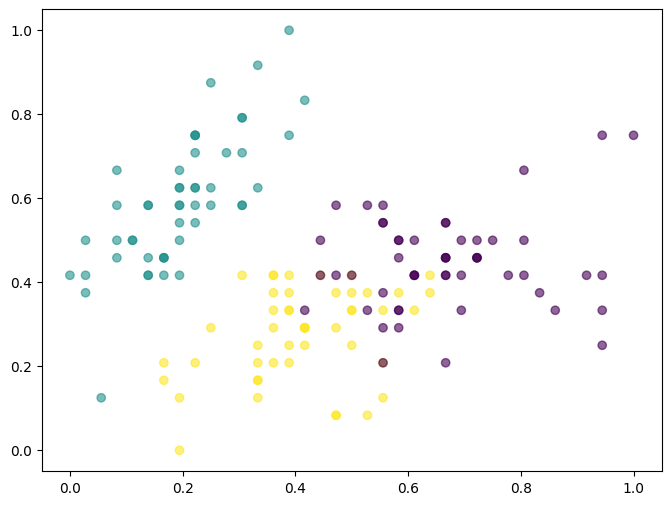

In [ ]:
# Scatter plot showing cluster distribution
plt.figure(figsize=(8, 6))
plt.scatter(df['sepal_length'], df['sepal_width'], c=df['Cluster'], cmap='viridis', alpha=0.6)
# X-axis → sepal_length; Y-axis → sepal_width;C
# color (c) → cluster label of each data point
# cmap='viridis' → color scheme for different clusters
# alpha=0.6 → transparency for better visibility of overlapping points

Text(0.5, 1.0, 'K-Means Clustering on Iris Dataset with Centroids')

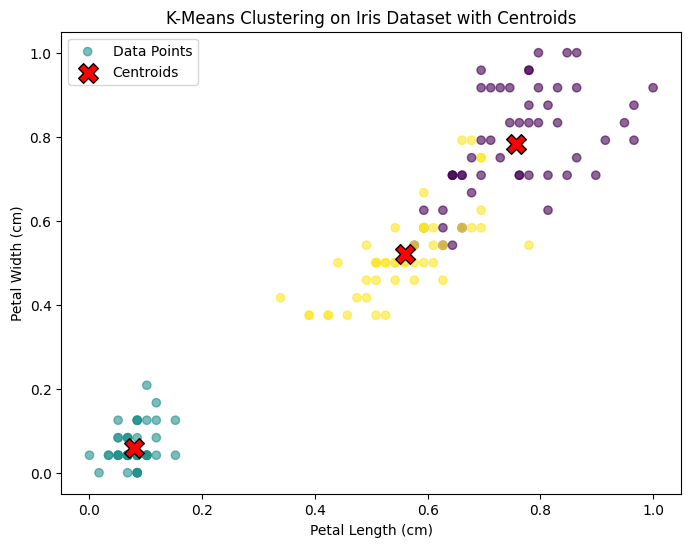

In [ ]:
plt.figure(figsize=(8, 6)) # Creates a plotting canvas of size 8 × 6 inches

plt.scatter(df.iloc[:, 2], df.iloc[:, 3], c=df['Cluster'], cmap='viridis', alpha=0.6,label = 'Data Points')
# X-axis → column index 2 (petal length) Y-axis → column index 3 (petal width)
# Colors → cluster labels
# Transparency → better visibility

centroids = kmeans.cluster_centers_     # Get cluster centroids
plt.scatter(centroids[:, 2],centroids[:, 3],c='red',marker='X',s=200,edgecolors='black',label="Centroids")
# Plot centroids
plt.legend()

# Labels & Title
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.title("K-Means Clustering on Iris Dataset with Centroids")


Text(0.5, 1.0, 'K-Means Clustering on Iris Dataset with Centroids')

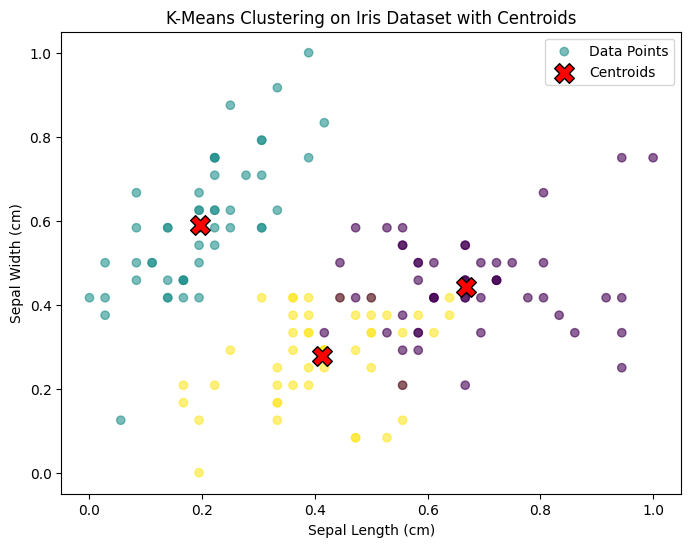

In [ ]:

plt.figure(figsize=(8, 6)) # Create figure
plt.scatter(df.iloc[:, 0], df.iloc[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.6, label="Data Points")
# Scatter plot of data points (colored by cluster)

centroids = kmeans.cluster_centers_  # Get cluster centroids

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1],c='red',marker='X',s=200,edgecolors='black',label="Centroids")
plt.legend()

# Labels & Title
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.title("K-Means Clustering on Iris Dataset with Centroids")